In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Step 1: Load Cleaned Data for EDA

We begin the EDA by loading the cleaned dataset and inspecting the structure.  
This helps confirm that the data was saved correctly and gives us a feel for key columns like `sales`, `profit`, `region`, and `category`.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional settings for better visuals
sns.set(style='whitegrid')
%matplotlib inline

# Load cleaned dataset
file_path = '../data/superstore_cleaned.csv'
df = pd.read_csv(file_path)

# Preview
print(f"Shape: {df.shape}")
df.head()

Shape: (9994, 21)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Step 2: Explore Key Metrics and Business Dimensions

We now explore high-level metrics like total sales, total profit, and quantity sold.  
We'll also look at key business dimensions: `region`, `category`, and `sub-category` to identify trends and areas of interest.


In [3]:
# Basic business KPIs
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_quantity = df['quantity'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity:,}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37,873


In [4]:
# Total sales by category
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
print("Sales by Category:\n", category_sales)

# Total sales by sub-category
subcategory_sales = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False)
print("\nTop 5 Sub-Categories by Sales:\n", subcategory_sales.head())

Sales by Category:
 category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: sales, dtype: float64

Top 5 Sub-Categories by Sales:
 sub-category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: sales, dtype: float64


In [5]:
# Total profit by region
region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False)
print("Profit by Region:\n", region_profit)

Profit by Region:
 region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64


In [6]:
# Total profit by sub-category
subcat_profit = df.groupby('sub-category')['profit'].sum().sort_values()

# Show bottom 5 (least profitable)
print("Bottom 5 Sub-Categories by Total Profit:\n")
print(subcat_profit.head(5))


Bottom 5 Sub-Categories by Total Profit:

sub-category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: profit, dtype: float64


## Insight:
- Technology leads in sales, with `Phones` performing best.
- The `West` region is the most profitable.
- Some sub-categories (e.g., `Tables`) may be generating losses and need deeper review.

# Step 3: Visualise Key Metrics

We now visualise the top metrics from our EDA to better understand trends, compare performance, and communicate findings clearly.  
Charts help stakeholders quickly identify problem areas and opportunities.


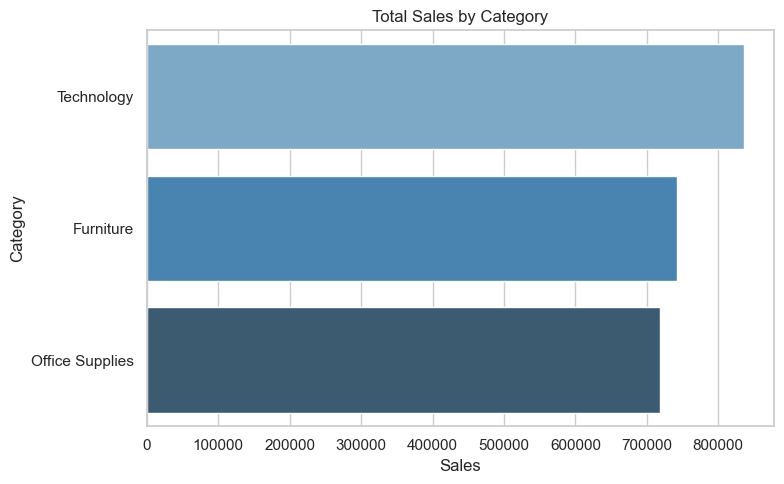

In [7]:
# Sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='Blues_d')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

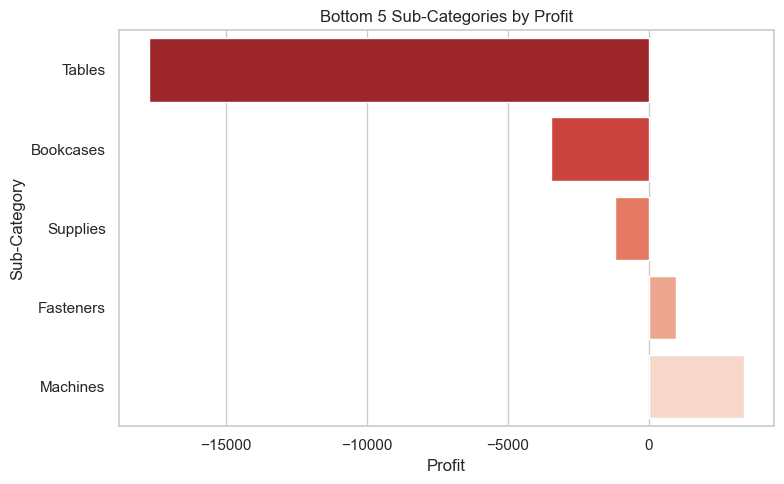

In [8]:
# Bottom 5 sub-categories by profit
plt.figure(figsize=(8, 5))
sns.barplot(x=subcat_profit.head(5).values, y=subcat_profit.head(5).index, palette='Reds_r')
plt.title('Bottom 5 Sub-Categories by Profit')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


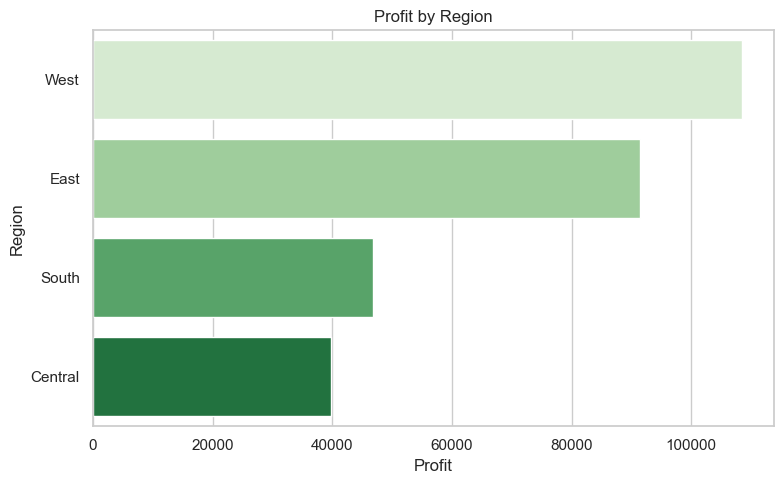

In [9]:
# Profit by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_profit.values, y=region_profit.index, palette='Greens')
plt.title('Profit by Region')
plt.xlabel('Profit')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


# Step 4: Sales and Profit Over Time

We now analyse how sales and profit change over time.
This helps identify growth trends, seasonal patterns, and any major fluctuations in performance.


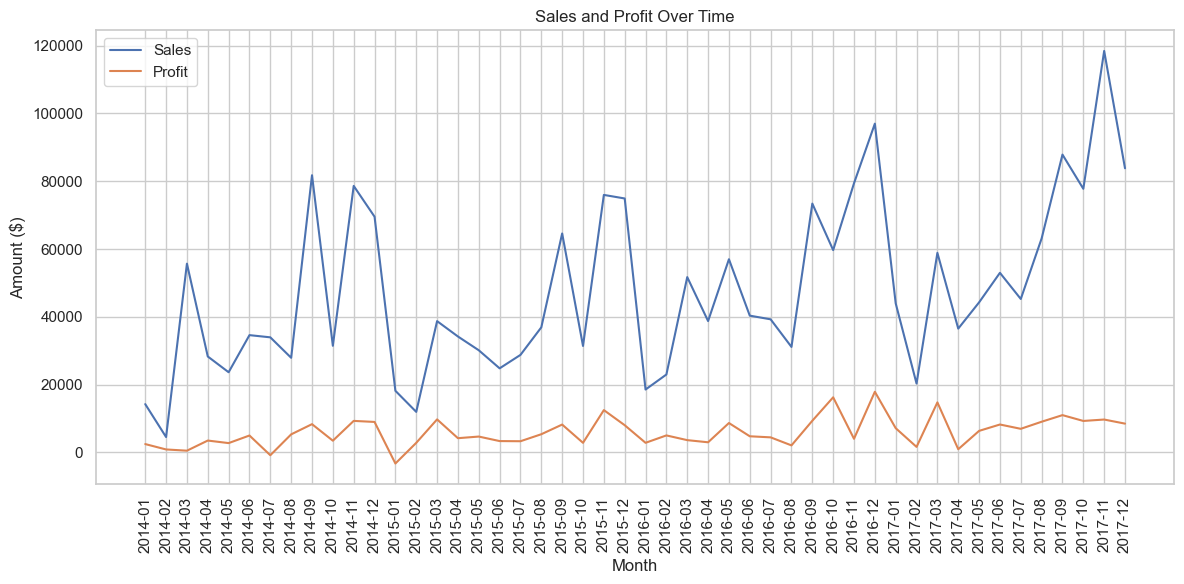

In [10]:
# Ensure order_date is datetime (in case it was reloaded as string)
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create new column for Year-Month
df['year_month'] = df['order_date'].dt.to_period('M').astype(str)

# Group by month and summarise
monthly = df.groupby('year_month')[['sales', 'profit']].sum().reset_index()

# Plot sales and profit over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='year_month', y='sales', label='Sales')
sns.lineplot(data=monthly, x='year_month', y='profit', label='Profit')
plt.title('Sales and Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Advanced Visualizations to Consider

1. Profit vs. Discount Scatter Plot     
See how discounts impact profitability. Are bigger discounts eating into profit?

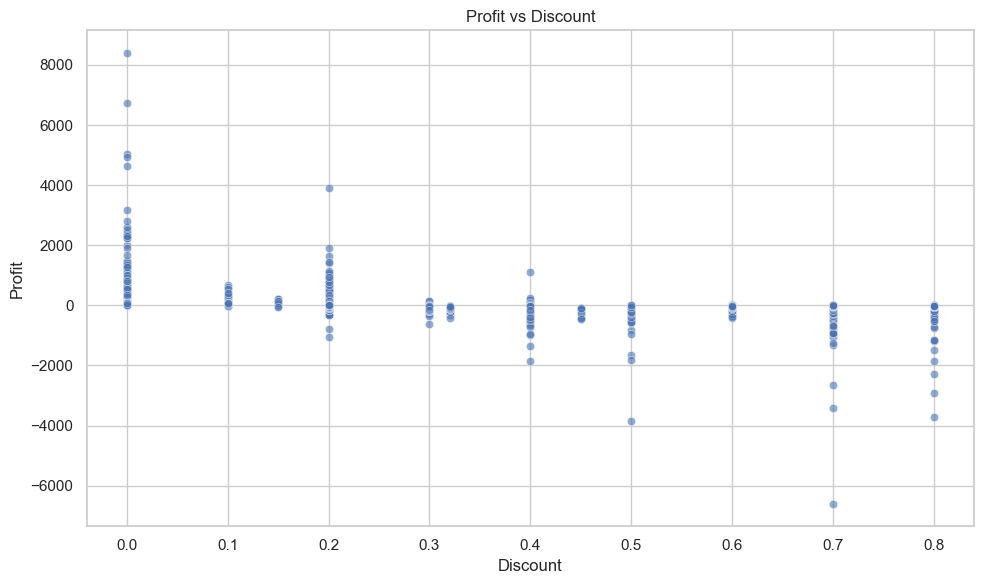

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.6)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


2. Category/Sub-category Profitability Heatmap  
Visualize profit contributions by category and sub-category in a heatmap for quick spotting of strong/weak areas.

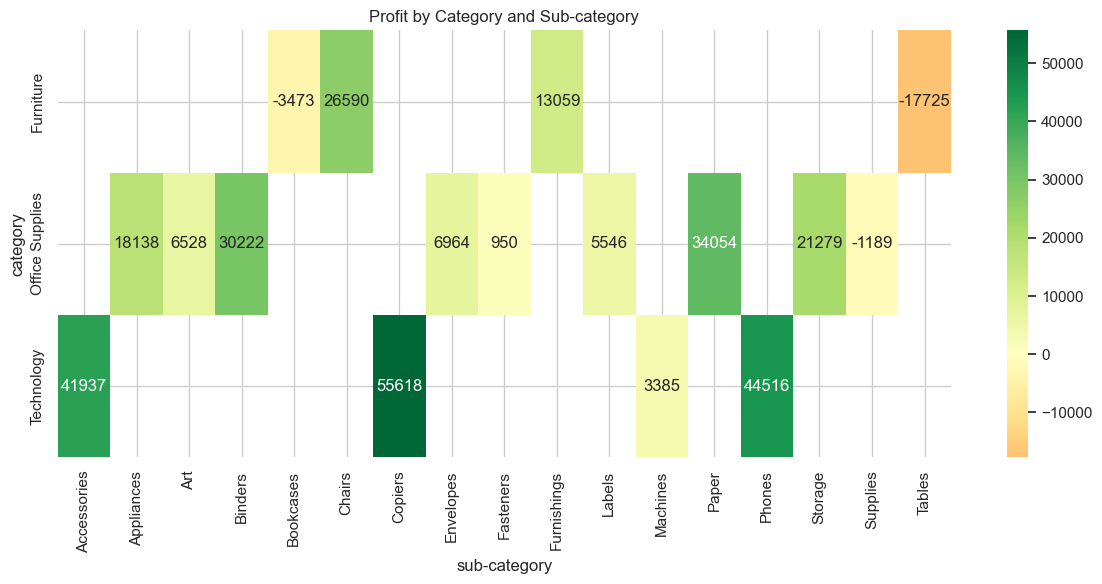

In [12]:
pivot = df.pivot_table(index='category', columns='sub-category', values='profit', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn', center=0)
plt.title('Profit by Category and Sub-category')
plt.tight_layout()
plt.show()


3. Sales and Profit Distribution by Region (Boxplots)   
Understand variability and outliers across regions.

In [13]:
df.groupby('region')['profit'].describe()


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Central,2323.0,17.092709,291.487465,-3701.8928,-5.6643,5.1840,22.456200,8399.9760
East,2848.0,32.135808,251.605084,-6599.9780,1.5579,8.1717,28.718550,5039.9856
South,1620.0,28.857673,212.893088,-3839.9904,1.9471,9.0720,34.233925,3177.4750
West,3203.0,33.849032,174.109081,-3399.9800,3.8520,11.1664,33.000400,6719.9808


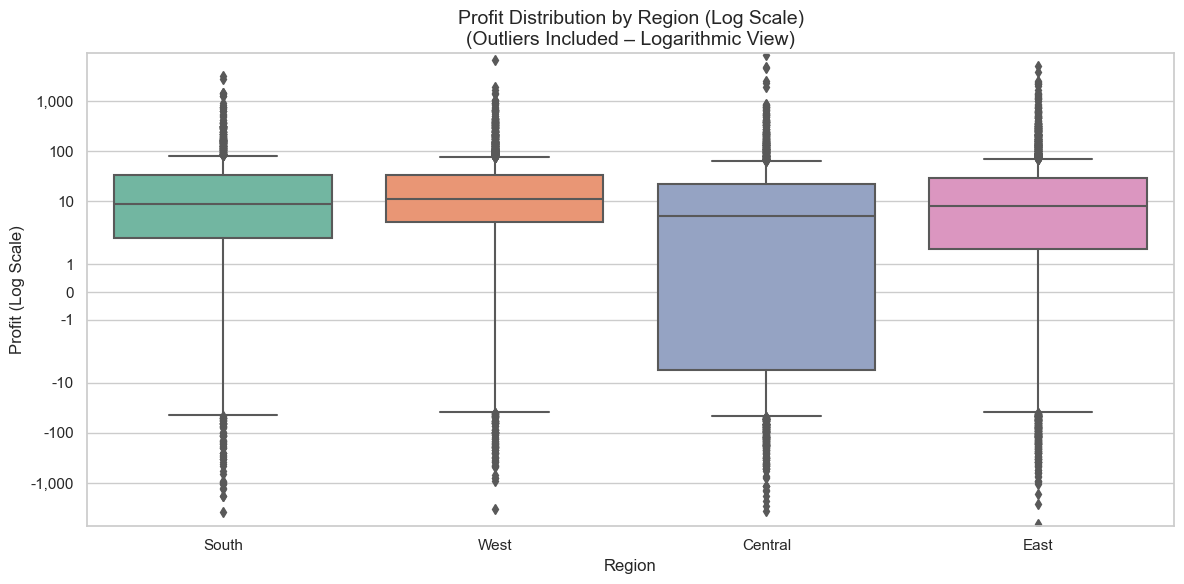

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='profit', data=df, palette='Set2')

plt.yscale('symlog')  # symmetric log handles both positive and negative profit
plt.title("Profit Distribution by Region (Log Scale)\n(Outliers Included – Logarithmic View)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Profit (Log Scale)", fontsize=12)

# Custom tick labels for log scale
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: f'{int(y):,}' if y != 0 else '0')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

4. Time Series Decomposition (Seasonality & Trend)

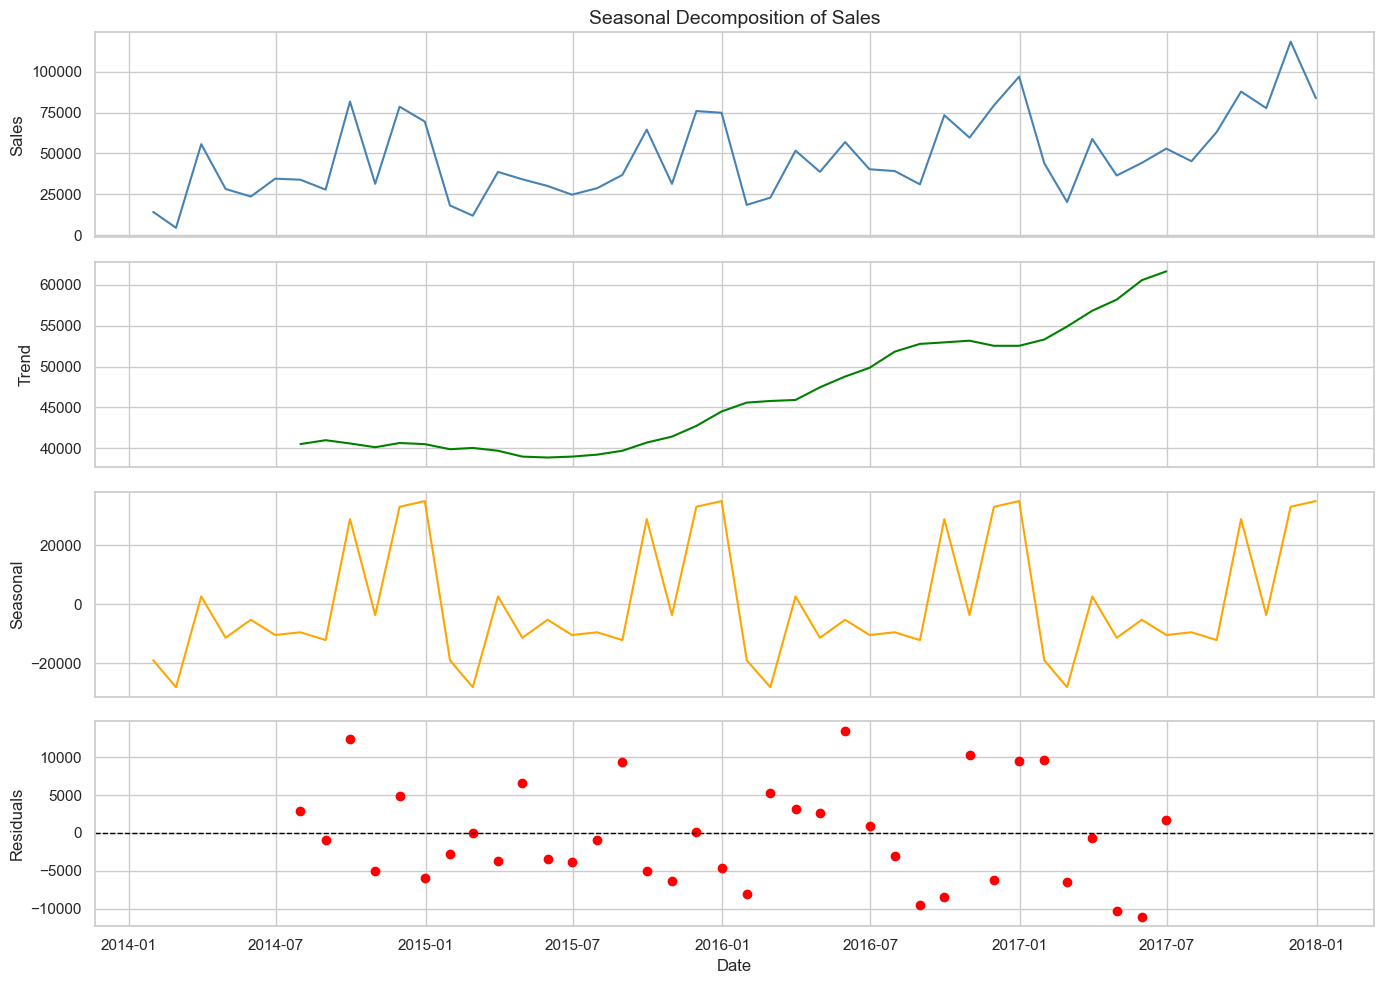

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure date is datetime and set as index
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)

# Monthly aggregation
monthly_sales = df['sales'].resample('M').sum()

# Decompose
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Original
ax1.plot(decomposition.observed, label='Observed', color='steelblue')
ax1.set_ylabel("Sales")
ax1.set_title("Seasonal Decomposition of Sales", fontsize=14)

# Trend
ax2.plot(decomposition.trend, label='Trend', color='green')
ax2.set_ylabel("Trend")

# Seasonal
ax3.plot(decomposition.seasonal, label='Seasonal', color='orange')
ax3.set_ylabel("Seasonal")

# Resid
ax4.plot(decomposition.resid, label='Residuals', marker='o', linestyle='', color='red')
ax4.axhline(0, linestyle='--', color='black', linewidth=1)
ax4.set_ylabel("Residuals")
ax4.set_xlabel("Date")

# Optional: format x-axis for clarity
import matplotlib.dates as mdates
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()


5. Top Customers by Sales and Profit

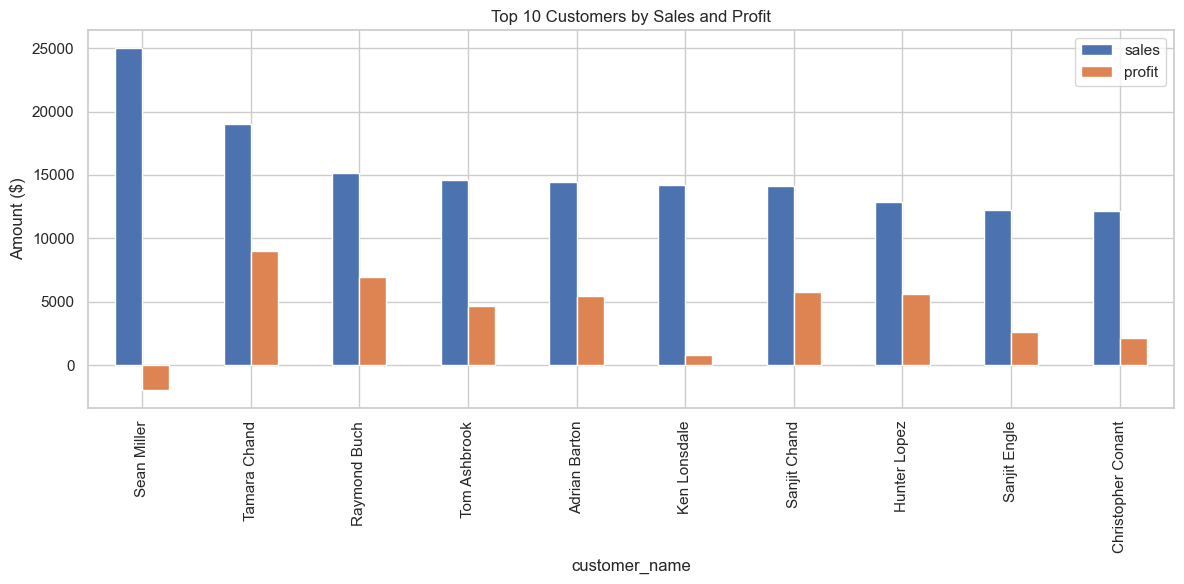

In [16]:
top_customers = df.groupby('customer_name')[['sales','profit']].sum().sort_values(by='sales', ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Customers by Sales and Profit')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()


# Insights, Summary & Recommendations

## Key Metrics

- **Total Sales:** \$2,297,200.86  
- **Total Profit:** \$286,397.02  
- **Total Quantity Sold:** 37,873 items  

---

## 1. Discount vs. Profit

- There’s a **clear negative correlation**: higher discounts generally lead to lower profits.  
- A few outliers show profitable high‑discount sales (likely bulk or strategic promotions).

---

## 2. Profit by Category & Sub-Category

- **Technology** is the most profitable category overall.
- **Furniture** underperforms compared to others, driven down by:
  - Tables  
  - Bookcases  
  - Furnishings  
- Within Technology, **Copiers** and **Phones** drive most profit.

---

## 3. Profit Distribution by Region

- **East** and **Central** show the **widest profit variability** (many high‑value orders but also deep losses).
- **West** has a tighter distribution — more consistent margins.
- **South** has the most **negative outliers** (big losses), suggesting shipping or discount issues.

---

## 4. Sales & Profit Over Time

- **Seasonal Peaks** in **November–December** (likely holiday promotions).
- **Mid‑year Dips** around **January-February** & **June–July**.
- **Profit generally follows sales**, but **lags behind in certain months**, suggesting margin inconsistencies.

---

## 5. Business Recommendations

Based on the analysis:

- **Reduce discounting** on underperforming sub-categories (e.g. Tables, Bookcases) where deep discounts result in net losses.
- **Focus marketing and inventory planning** on **Copiers and Phones**, which drive strong profitability.
- **Investigate shipping/logistics** in the **South region** to understand root causes of repeated losses.
- **Ramp up marketing campaigns and stock** in Q4 (especially November–December) to maximise seasonal demand.
- **Monitor early to mid-year slowdowns** and explore promotions or product bundling to offset sales dips.

These steps can help improve margin control, product focus, and operational efficiency.
